In [15]:
import os
import cv2
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow import keras
from tensorflow.keras import Model, Input, optimizers

from PIL import Image

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



In [16]:
import os
print(os.listdir("./cell-images/cell_images"))

['Parasitized', 'Uninfected']


In [17]:
infected = os.listdir('./cell-images/cell_images/Parasitized/') 
uninfected = os.listdir('./cell-images/cell_images/Uninfected/')

In [18]:
#retrieving the images and storing them in the arrays
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("./cell-images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        
        data.append(np.array(resize_img))
        
        labels.append(1)
        
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("./cell-images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        
        data.append(np.array(resize_img))
        
        labels.append(0)
        
    except AttributeError:
        print('')

In [19]:
cells = np.array(data)
labels = np.array(labels)
cells.shape,labels.shape

((27558, 64, 64, 3), (27558,))

In [20]:
#Shuffle the data
cells,labels = shuffle(cells,labels)


In [21]:
cells = cells.astype("float32")/255
labels = tf.keras.utils.to_categorical(labels)


In [22]:
x_train,x_test,y_train,y_test = train_test_split(cells,labels,test_size=0.33,random_state=45)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18463, 64, 64, 3), (9095, 64, 64, 3), (18463, 2), (9095, 2))

In [23]:


model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(32))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flat

In [24]:
history = model.fit(x_train, y_train, batch_size=32, epochs=8, validation_split=0.15)

Train on 15693 samples, validate on 2770 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/8
15693/15693 [==============================] - 142s 9ms/sample - loss: 0.6770 - acc: 0.5819 - val_loss: 0.6408 - val_acc: 0.6289
Epoch 2/8
15693/15693 [==============================] - 134s 9ms/sample - loss: 0.5882 - acc: 0.7063 - val_loss: 0.7144 - val_acc: 0.8473
Epoch 3/8
15693/15693 [==============================] - 193s 12ms/sample - loss: 0.3069 - acc: 0.8943 - val_loss: 0.2269 - val_acc: 0.9245
Epoch 4/8
15693/15693 [==============================] - 198s 13ms/sample - loss: 0.1925 - acc: 0.9356 - val_loss: 0.2243 - val_acc: 0.9332
Epoch 5/8
15693/15693 [==============================] - 196s 12ms/sample - loss: 0.1637 - acc: 0.9437 - val_loss: 0.1959 - val_acc: 0.9343
Epoch 6/8
15693/15693 [==============================] - 200s 13ms/sample - loss: 0.1480 - acc: 0.9497 - val_loss: 0.1964 - val_acc: 0.9455
Epoch 7/8
15693/15693 [==============================] - 235s 15m

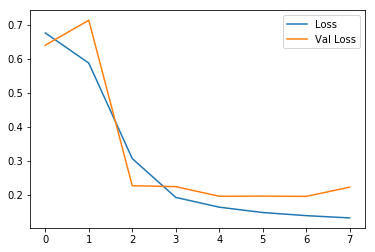

In [25]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label="Val Loss")
plt.legend()

In [26]:
accuracy  = model.evaluate(x_test,y_test)
print("Test Accuracy:-",accuracy)

9095/9095 [==============================] - 31s 3ms/sample - loss: 0.2068 - acc: 0.9340
Test Accuracy:- [0.206830194744027, 0.9340297]
